In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
tau = 100 #no. of states
n = 5 #no. of trajectories
s = np.zeros((n,tau)) # State Sequence
y = np.zeros((n,tau)) # Measurement Sequence

np.random.seed(30)

s[:,0] = np.random.normal(0, 0.5, n)
y[:,0] = (0.05*(s[:,0]**2)) + np.random.normal(0, 0.5, n)

for i in range(1,tau):
    s[:,i] = (0.5*s[:,i-1]) + ((25*s[:,i-1])/(1+(s[:,i-1]**2))) + (8*np.cos(1.2*(i-1))) + np.random.normal(0, 0.5, n)
    y[:,i] = (0.05*(s[:,i]**2)) + np.random.normal(0, 0.5, n)

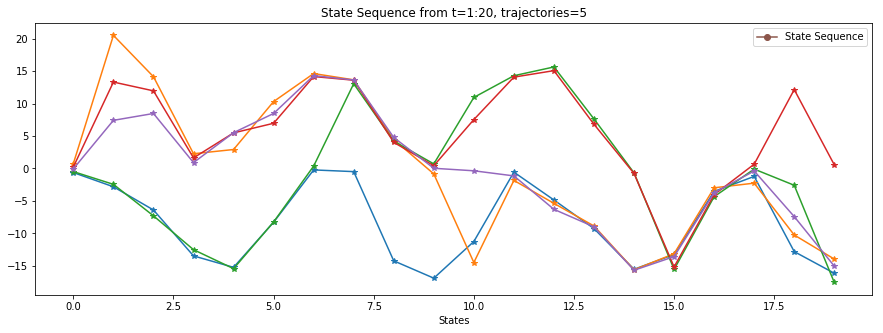

In [3]:
plt.rcParams['figure.figsize'] = 15, 5
plt.plot(s.T[:20], '*-')
plt.title("State Sequence from t=1:{}, trajectories={}".format(20, n))
plt.plot([],[], 'o-', label='State Sequence')
plt.xlabel('States')
plt.legend(loc='best')
plt.show()

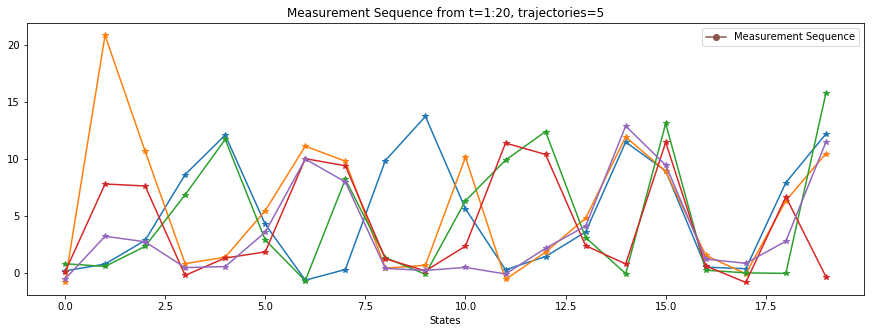

In [4]:
plt.plot(y.T[:20], '*-')
plt.title("Measurement Sequence from t=1:{}, trajectories={}".format(20, n))
plt.plot([],[], 'o-', label='Measurement Sequence')
plt.xlabel('States')
plt.legend(loc='best')
plt.show()

In [5]:
# Initializing particles
N = 100
np.random.seed(30)
x = np.zeros((n,tau,N))
x[:,0] = np.random.normal(0, 0.5, N)


for j in range(n):
    for i in range(1,tau):
        x[j,i] = np.random.normal(x[j,i-1], 0.5, N) # Importance Sampling
        w_tilde = norm.cdf(y[j,i-1], loc=x[j,i], scale=0.5) # Likelihood
        w = w_tilde/np.sum(w_tilde) # Normalize
        z = np.random.choice(np.arange(N), N, replace=True, p=w) # Resampling
        x[j] = x[j, :, z].T # Resampling whole path not just the last step

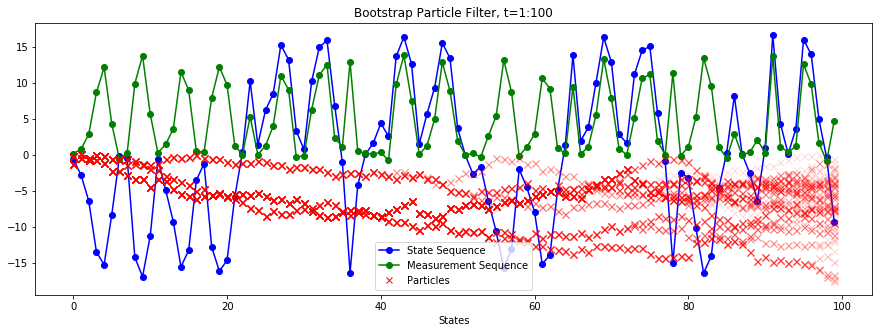

In [6]:
plt.plot(s[0], 'bo-')
plt.plot(y[0], 'go-')

for k in range(1):
    for j in range(tau):
        for i in range(N):
                plt.plot(j, x[k,j,i], 'r', marker='x', alpha=0.15, ms=7)
            
plt.title("Bootstrap Particle Filter, t=1:{}".format(tau))
plt.plot([],[], 'bo-', label='State Sequence')
plt.plot([],[], 'go-', label='Measurement Sequence')
plt.plot([],[], 'rx', label='Particles')
plt.xlabel('States')
plt.legend(loc='best')
plt.show()